In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
path_optical_values = r"../../Data/optical-rs/optical_values.csv"

In [4]:
df = pd.read_csv(path_optical_values)

# cap all values of above 5 to 5
df["optical_values"] = df["optical_values"].apply(lambda x: 5 if x > 5 else x)

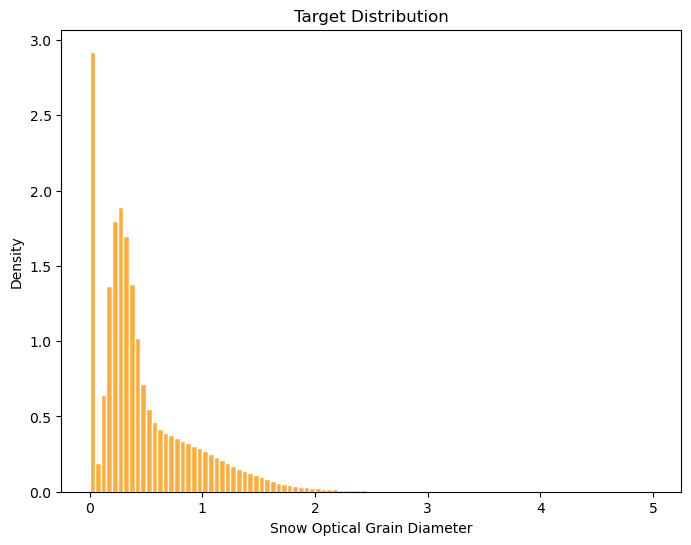

In [65]:
# Plot transformed data on a normal scale
plt.figure(figsize=(8, 6))
plt.hist(df["optical_values"],edgecolor="white", color="#fead3a", bins=100, density=True)
plt.title('Target Distribution')
plt.xlabel('Snow Optical Grain Diameter')
plt.ylabel('Density')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

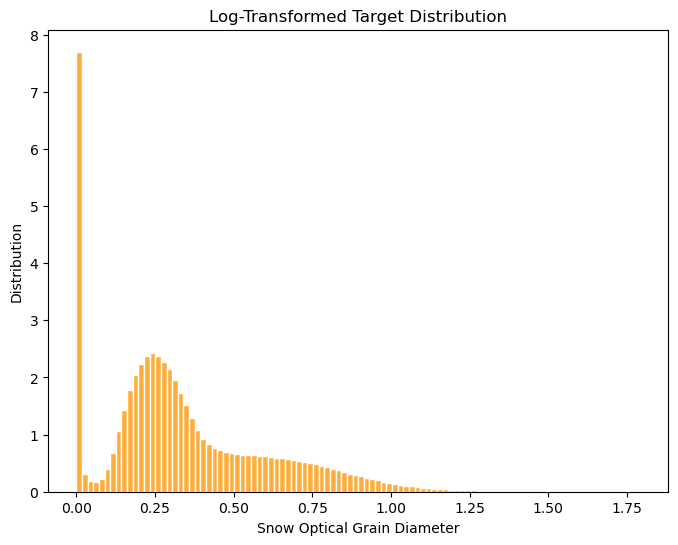

In [66]:
# apply log transformation of the optical values + 1 (to prevent log(0)) and save as a new column
df['log_transform'] = np.log(1 + df['optical_values'])

# Plot transformed data on a normal scale
plt.figure(figsize=(8, 6))
plt.hist(df["log_transform"],edgecolor="white", bins=100, color="#fead3a", density=True)
# set x axis limit
plt.title('Log-Transformed Target Distribution')
plt.xlabel('Snow Optical Grain Diameter')
plt.ylabel('Distribution')
plt.ticklabel_format(style='plain', axis='y')
#plt.xscale('log')
plt.show()

In [ ]:
from scipy.stats import probplot


# Plot the QQ plot
fig, ax = plt.subplots(figsize=(8, 6))
probplot(df["optical_values"], plot=ax)

# Add title and labels
ax.set_title("QQ Plot", fontsize=14)
ax.set_xlabel("Theoretical Quantiles", fontsize=12)
ax.set_ylabel("Sample Quantiles", fontsize=12)

plt.show()

In [40]:
from scipy.stats import anderson

# perform Anderson-Darling test on original data
result_orig = anderson(df["optical_values"])

# perform Anderson-Darling test on log-transformed data
result_log = anderson(df["log_transform"])


# print results
print("Anderson-Darling test results:")
print("Original data: statistic=%.3f, p-value=%.3f" % (result_orig.statistic, result_orig.critical_values[result_orig.significance_level == 15]))
print("Log-transformed data: statistic=%.3f, p-value=%.3f" % (result_log.statistic, result_log.critical_values[result_log.significance_level == 15]))

Anderson-Darling test results:
Original data: statistic=2917669.440, p-value=0.576
Log-transformed data: statistic=6263626.069, p-value=0.576


# TESTING

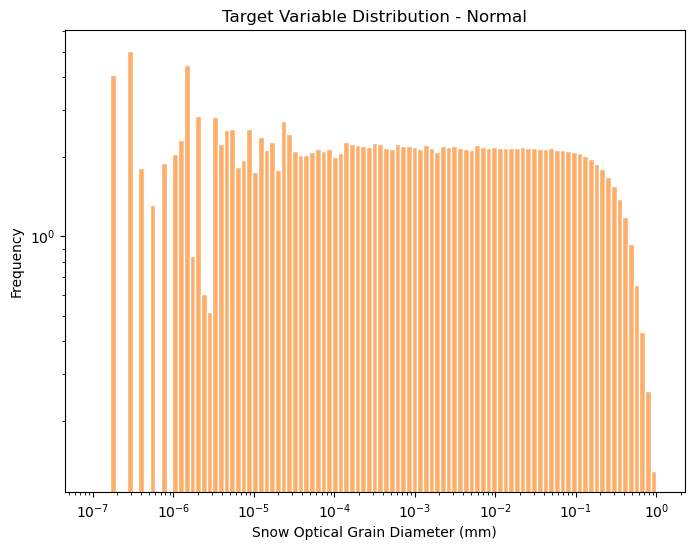

In [51]:
# Plot transformed data on a normal scale
plt.figure(figsize=(8, 6))
plt.hist(df["log_transform"],edgecolor="white", color="#FDAE6B", bins=np.logspace(-7, 0, 100), density=True)
plt.title('Target Variable Distribution - Normal')
plt.xlabel('Snow Optical Grain Diameter (mm)')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='y')

plt.xscale('log')
plt.yscale('log')
plt.show()

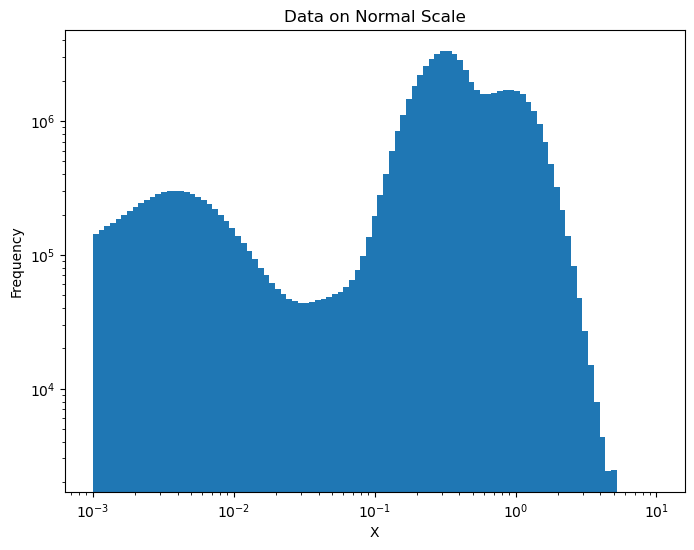

In [5]:
# Plot transformed data on a log scale
plt.figure(figsize=(8, 6))
plt.hist(df["optical_values"], bins=np.logspace(-3, 1, 100))
plt.title('Data on Normal Scale')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [5]:
# apply log transformation of the optical values + 1 (to prevent log(0)) and save as a new column
df['log_transform'] = np.log(1 + df['optical_values'])

# apply z-score transformation and save as a new column
df['zscore_transform'] = (df['optical_values'] - df['optical_values'].mean()) / df['optical_values'].std()

# apply z-score transformation to log-transformed data and save as a new column
df['zscore_transform_log'] = (df['log_transform'] - df['log_transform'].mean()) / df['log_transform'].std()

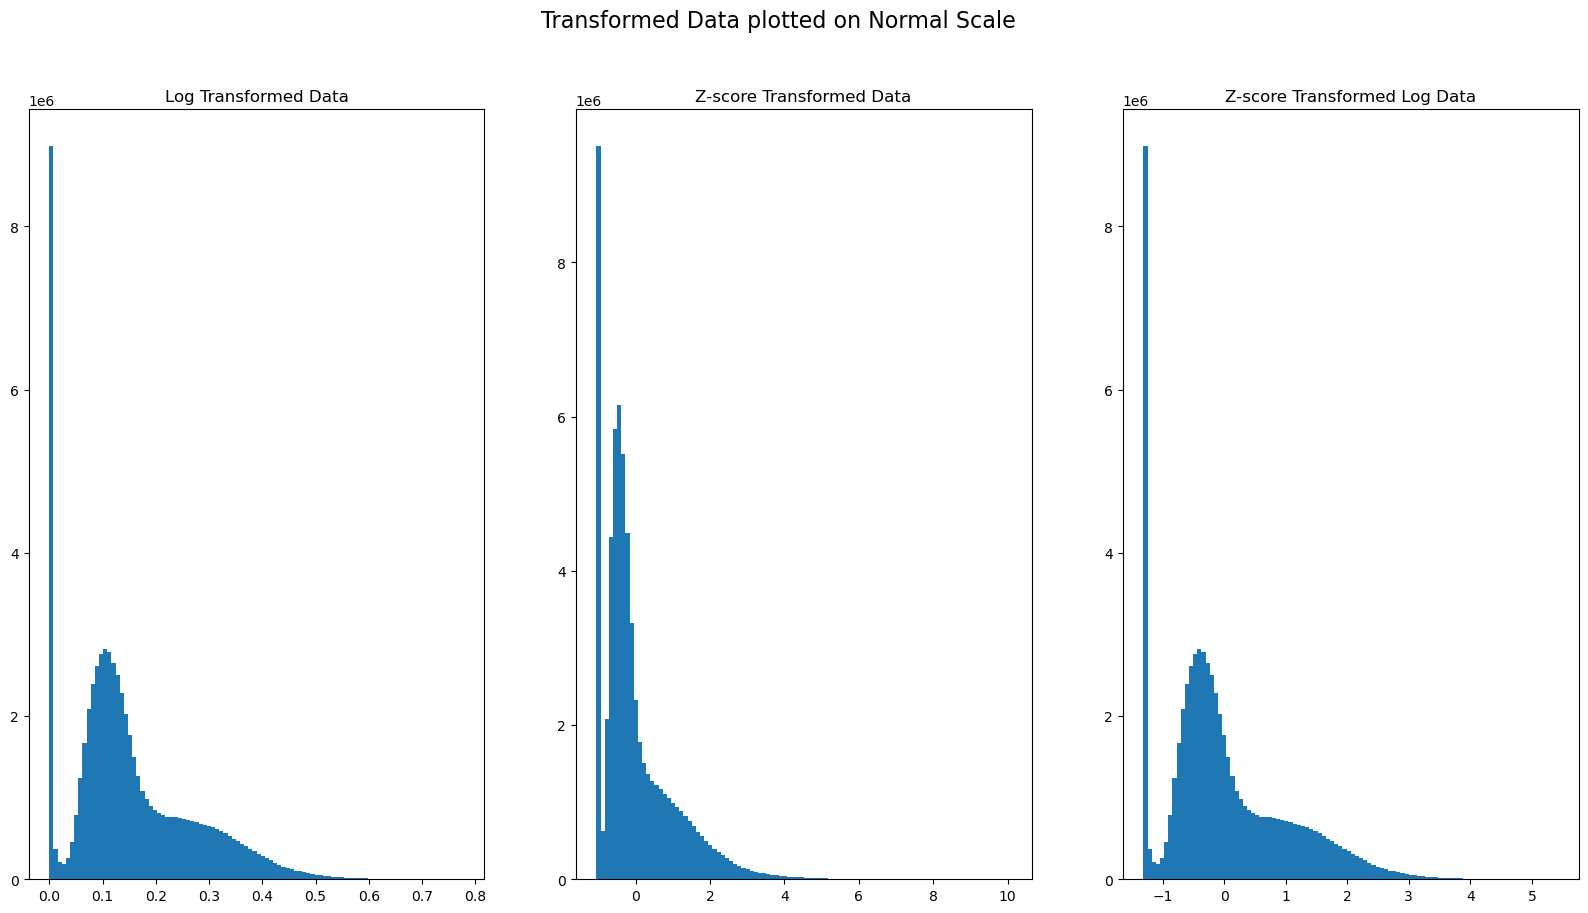

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Transformed Data plotted on Normal Scale', fontsize=16)

ax[0].hist(df["log_transform"], bins=100)
ax[0].set_title('Log Transformed Data')

ax[1].hist(df["zscore_transform"], bins=100)
ax[1].set_title('Z-score Transformed Data')

ax[2].hist(df["zscore_transform_log"], bins=100)
ax[2].set_title('Z-score Transformed Log Data')


plt.show()

**We decide to apply log transformation to the target variable.**